# Weather

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('p24-projet-pe-groupe-8/daily-weather-cities.csv')
df.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,11035,Vienna,1855-02-01,Winter,NaN,-8.5,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11035,Vienna,1855-02-02,Winter,NaN,-12.1,-3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11035,Vienna,1855-02-03,Winter,NaN,-17.5,-8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11035,Vienna,1855-02-04,Winter,NaN,-11.4,-6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11035,Vienna,1855-02-05,Winter,NaN,-7.5,-1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Données générales de la table

In [3]:
print(df.ndim)
print(df.shape)
print(df.columns)

2
(193119, 14)
Index(['station_id', 'city_name', 'date', 'season', 'avg_temp_c', 'min_temp_c',
       'max_temp_c', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'peak_wind_gust_kmh', 'avg_sea_level_pres_hpa',
       'sunshine_total_min'],
      dtype='object')


In [4]:
df.describe()

,station_id,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
count,193119.000000,94672.000000,191314.000000,191598.000000,152546.000000,55013.000000,42054.000000,45853.000000,21784.000000,42547.000000,18925.000000
mean,8674.711235,10.622556,6.348172,14.231167,1.888934,10.943831,193.547891,13.716361,38.936683,1015.981143,280.843382
std,2098.969159,7.485526,6.691068,8.601553,4.373271,44.779003,95.058097,5.921333,14.362104,9.133276,265.674706
min,6447.000000,-18.500000,-26.000000,-17.600000,0.000000,0.000000,0.000000,0.000000,7.600000,967.800000,0.000000
25%,6447.000000,5.100000,1.500000,7.700000,0.000000,0.000000,112.000000,9.400000,28.800000,1010.500000,18.000000
50%,7149.000000,10.800000,6.700000,14.500000,0.000000,0.000000,214.000000,12.800000,36.700000,1016.300000,222.000000
75%,11035.000000,16.500000,11.700000,21.000000,1.800000,0.000000,268.000000,17.000000,46.400000,1021.800000,480.000000
max,11035.000000,33.400000,25.300000,41.900000,119.500000,2329.000000,360.000000,52.200000,129.600000,1048.500000,978.000000


In [5]:
print(f'On étudie le temps dans {len(df['city_name'].unique())} villes différentes: {df['city_name'].unique()}')

On étudie le temps dans 4 villes différentes: ['Vienna' 'Brussels' 'Paris' 'Berlin']


In [6]:
print(f'On étudie le temps sur {len(df['date'].unique())} jours')

On étudie le temps sur 69642 jours


In [7]:
df.loc[df['city_name'] == 'Brussels', 'date']

61477     1833-01-02
61478     1833-01-03
61479     1833-01-04
61480     1833-01-05
61481     1833-01-06
             ...    
130819    2023-08-24
130820    2023-08-25
130821    2023-08-26
130822    2023-08-27
130823    2023-08-28
Name: date, Length: 69347, dtype: object

In [8]:
df.loc[df['city_name'] == 'Vienna', 'date']

0        1855-02-01
1        1855-02-02
2        1855-02-03
3        1855-02-04
4        1855-02-05
            ...    
61472    2023-08-31
61473    2023-09-01
61474    2023-09-02
61475    2023-09-03
61476    2023-09-04
Name: date, Length: 61477, dtype: object

In [9]:
df.loc[df['city_name'] == 'Paris', 'date']

130824    1921-03-01
130825    1921-03-02
130826    1921-03-03
130827    1921-03-04
130828    1921-03-05
             ...    
160834    2023-08-31
160835    2023-09-01
160836    2023-09-02
160837    2023-09-03
160838    2023-09-04
Name: date, Length: 30015, dtype: object

In [10]:
df.loc[df['city_name'] == 'Berlin', 'date']

160839    1931-01-01
160840    1931-01-02
160841    1931-01-03
160842    1931-01-05
160843    1931-01-06
             ...    
193114    2023-08-30
193115    2023-08-31
193116    2023-09-01
193117    2023-09-02
193118    2023-09-03
Name: date, Length: 32280, dtype: object

Entre le 2 janvier 1833 (Brussels) et le 4 septembre 2023 (Vienne) il y a bien 69 642 jours

In [11]:
df['city_name'].value_counts()

city_name
Brussels    69347
Vienna      61477
Berlin      32280
Paris       30015
Name: count, dtype: int64

In [12]:
df['date'].dtype

dtype('O')

In [13]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)
df['date'].dtype

datetime64[ns]


dtype('<M8[ns]')

## Analyse

### En moyenne

In [14]:
df['mean_temp'] = 0.5*(df['max_temp_c'] + df['min_temp_c']) 
df['mean_temp'].isna #on crée cette colonne plutôt que d'utiliser ave_temp_c pour ne pas avoir de données manquantes

<bound method Series.isna of 0         -6.25
1         -7.95
2        -12.90
3         -8.85
4         -4.40
          ...  
193114    15.80
193115    16.55
193116    16.95
193117    17.90
193118    18.70
Name: mean_temp, Length: 193119, dtype: float64>

8.36719554871603


<Axes: title={'center': 'Température moyenne à Viennes sur 2 siècle'}, xlabel='date', ylabel='température en (°C)'>

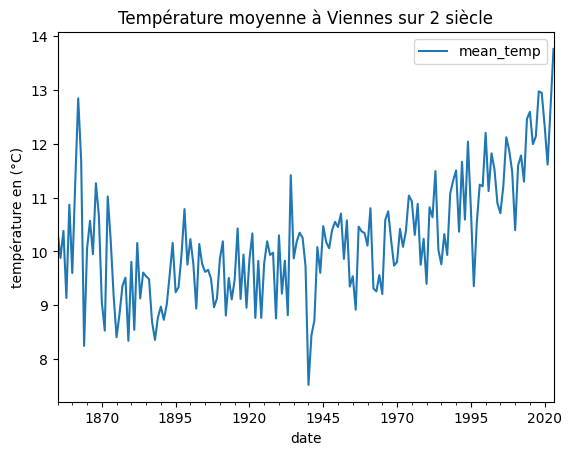

In [46]:
#1ère méthode
df1 = df[df['city_name'] == 'Vienna']
df1 = df1[['date', 'mean_temp']]
df1 = df1.set_index('date')
print(df1['mean_temp'].std())
df_v = df1.resample('YE').mean()
df_v.plot(ylabel='température en (°C)', title = 'Température moyenne à Viennes sur 2 siècle')

<Axes: title={'center': 'Température moyenne à Viennes sur 80 ans'}, xlabel='date', ylabel='température en (°C)'>

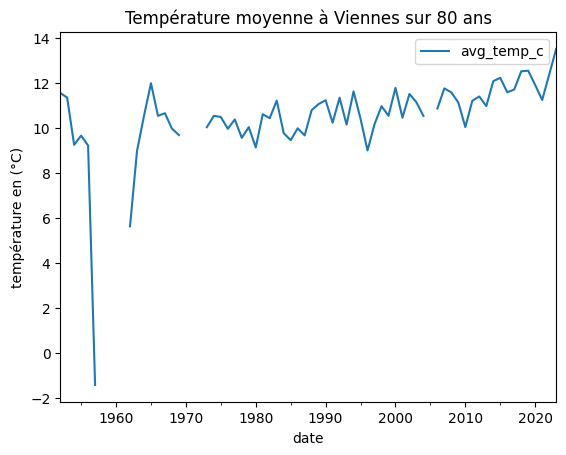

In [48]:
#ou bien
df2 = df[df['city_name'] == 'Vienna']
df2 = df2[['date', 'avg_temp_c']]
df2 = df2.set_index('date')
df2 = df2.dropna()
df_v = df2.resample('YE').mean()
df_v.plot(ylabel='température en (°C)', title = 'Température moyenne à Viennes sur 80 ans')

6.653111093052007


<Axes: title={'center': 'Température moyenne à Paris sur 80 ans'}, xlabel='date', ylabel='température en (°C)'>

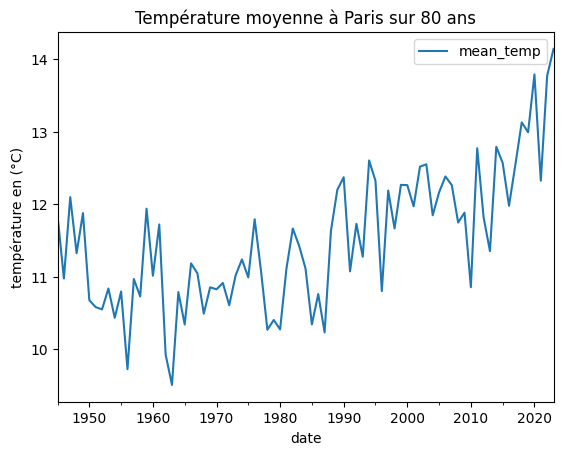

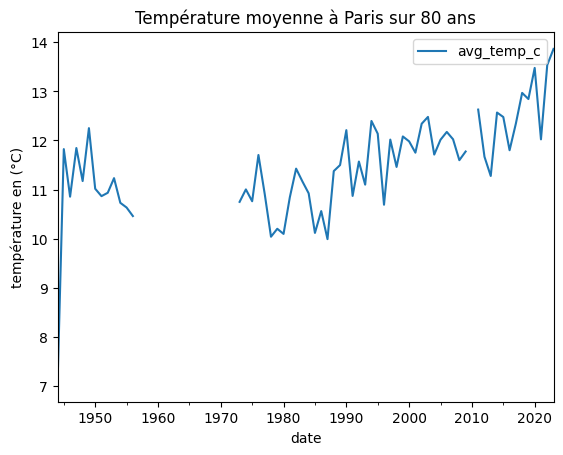

In [49]:
df1 = df[df['city_name'] == 'Paris']
df1 = df1[['date', 'mean_temp']]
df1 = df1.set_index('date')
df1 = df1['1945':] #on enlève les valeurs qui manquent/ne semblent pas pertinentes
print(df1['mean_temp'].std())
df_v = df1.resample('YE').mean()
df_v.plot(ylabel='température en (°C)', title = 'Température moyenne à Paris sur 80 ans')
#ou bien
df2 = df[df['city_name'] == 'Paris']
df2 = df2[['date', 'avg_temp_c']]
df2 = df2.set_index('date')
df2 = df2.dropna()
df_v = df2.resample('YE').mean()
df_v.plot(ylabel='température en (°C)', title = 'Température moyenne à Paris sur 80 ans')

7.901579523806039


<Axes: title={'center': 'Température moyenne à Berlin sur 80 ans'}, xlabel='date', ylabel='température en (°C)'>

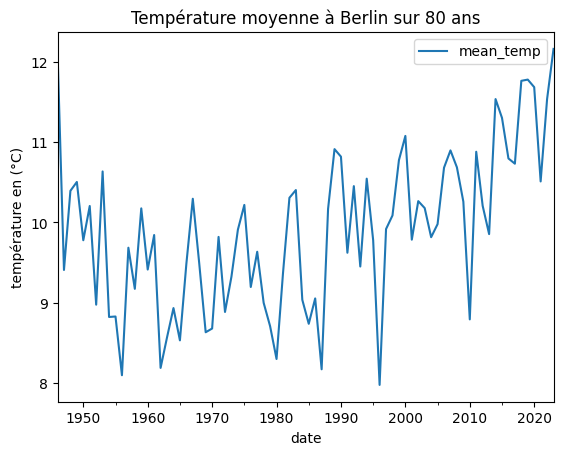

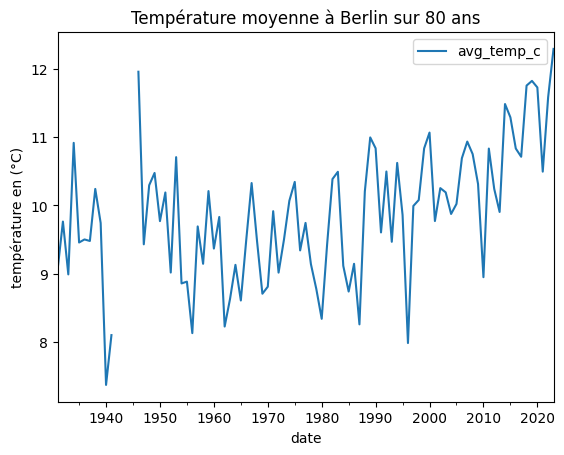

In [50]:
df1 = df[df['city_name'] == 'Berlin']
df1 = df1[['date', 'mean_temp']]
df1 = df1.set_index('date')
df1 = df1['1945':] #on enlève les valeurs qui manquent/ne semblent pas pertinentes/inutiles
print(df1['mean_temp'].std())
df_v = df1.resample('YE').mean()
df_v.plot(ylabel='température en (°C)', title = 'Température moyenne à Berlin sur 80 ans')
#ou bien
df2 = df[df['city_name'] == 'Berlin']
df2 = df2[['date', 'avg_temp_c']]
df2 = df2.set_index('date')
df2 = df2.dropna()
df_v = df2.resample('YE').mean()
df_v.plot(ylabel='température en (°C)', title = 'Température moyenne à Berlin sur 80 ans')

6.659057895330448


<Axes: title={'center': 'Température moyenne à Brussels sur 50 ans'}, xlabel='date', ylabel='température en (°C)'>

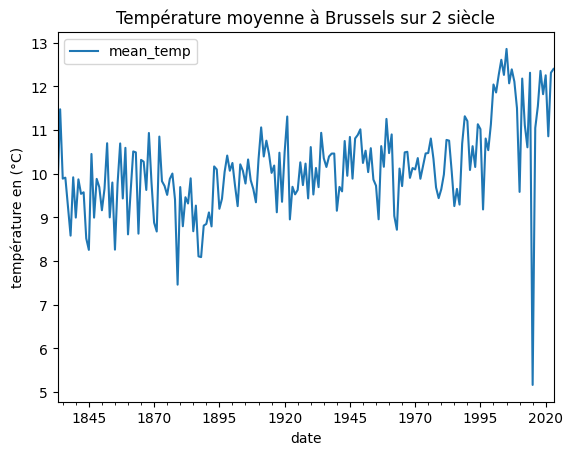

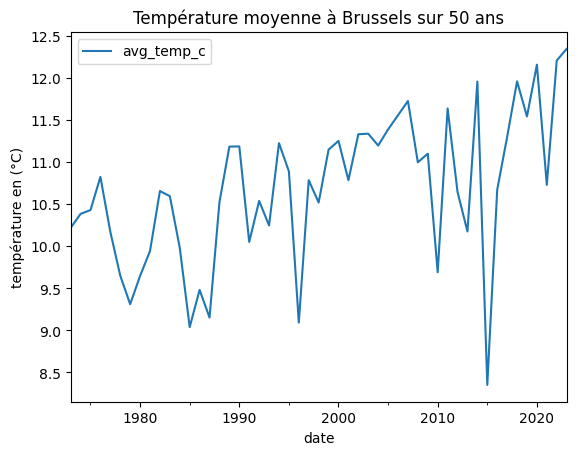

In [51]:
df1 = df[df['city_name'] == 'Brussels']
df1 = df1[['date', 'mean_temp']]
df1 = df1.set_index('date')
print(df1['mean_temp'].std())
df_v = df1.resample('YE').mean()
df_v.plot(ylabel='température en (°C)', title = 'Température moyenne à Brussels sur 2 siècle')
#ou bien
df2 = df[df['city_name'] == 'Brussels']
df2 = df2[['date', 'avg_temp_c']]
df2 = df2.set_index('date')
df2 = df2.dropna()
df_v = df2.resample('YE').mean()
df_v.plot(ylabel='température en (°C)', title = 'Température moyenne à Brussels sur 50 ans')

COMMENTAIRES:
- Dans chacun des cas on observe une augmentation de la température moyenne ce qui correpond aux effets du changement climatique
- En 2023 la ville la plus chaude en moyenne est Paris, la ville la plus froide est Berlin
- La ville avec l'écart type le plus fort est Vienne: soit c'est la ville où

On pourrait tracer une courbe de tendance pensant au milieu des points pour mieux mettre en valeur le phénomène de réchauffement climatique mais je ne savais pas comment le faire

### Quelle est la meilleure ville à visiter en hiver ?

In [20]:
df_neige = df[df['season'] == 'Winter']
df_neige = df_neige[['date', 'snow_depth_mm']]
df_neige.set_index('date', inplace = True)
df_neige = df_neige.resample('YE').sum()
df_neige = df_neige.mean()
df_neige

snow_depth_mm    2633.115183
dtype: float64

In [21]:
df_neige = df[(df['season'] == 'Winter') & (df['city_name'] == 'Vienna')]
df_neige = df_neige[['date', 'snow_depth_mm']]
df_neige.set_index('date', inplace = True)
df_neige = df_neige.resample('YE').sum()
df_neige = df_neige.mean()
df_neige

snow_depth_mm    2099.147929
dtype: float64

In [22]:
df_neige = df[(df['season'] == 'Winter') & (df['city_name'] == 'Berlin')]
df_neige = df_neige[['date', 'snow_depth_mm']]
df_neige.set_index('date', inplace = True)
df_neige = df_neige.resample('YE').sum()
df_neige = df_neige.mean()
df_neige

snow_depth_mm    1245.053763
dtype: float64

In [23]:
df_neige = df[(df['season'] == 'Winter') & (df['city_name'] == 'Paris')]
df_neige = df_neige[['date', 'snow_depth_mm']]
df_neige.set_index('date', inplace = True)
df_neige = df_neige.resample('YE').sum()
df_neige = df_neige.mean()
df_neige

snow_depth_mm    58.349515
dtype: float64

In [24]:
df_neige = df[(df['season'] == 'Winter') & (df['city_name'] == 'Brussels')]
df_neige = df_neige[['date', 'snow_depth_mm']]
df_neige.set_index('date', inplace = True)
df_neige = df_neige.resample('YE').sum()
df_neige = df_neige.mean()
df_neige

snow_depth_mm    138.057592
dtype: float64

Text(0.5, 1.0, 'Moyenne de chute des neiges')

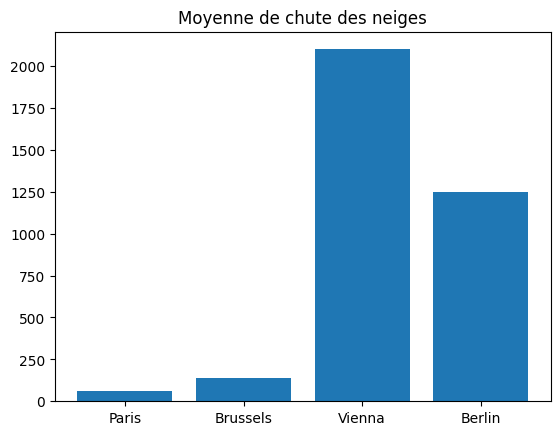

In [25]:
plt.bar(x=['Paris', 'Brussels', 'Vienna', 'Berlin'], height=[58.349515, 138.057592, 2099.147929, 1245.05763])
plt.title('Moyenne de chute des neiges')

COMMENTAIRE : Vienne est la ville où il y a le plus de neige

### Et en été ?

In [38]:
df_soleil = df[(df['season'] == 'Summer') & (df['city_name'] == 'Paris')]
df_soleil = df_soleil[['date', 'sunshine_total_min']]
df_soleil.set_index('date', inplace = True)
df_soleil = df_soleil.resample('YE').sum()
df_soleil = df_soleil.mean()
df_soleil

sunshine_total_min    0.0
dtype: float64

In [39]:
df_soleil = df[(df['season'] == 'Summer') & (df['city_name'] == 'Berlin')]
df_soleil = df_soleil[['date', 'sunshine_total_min']]
df_soleil.set_index('date', inplace = True)
df_soleil = df_soleil.resample('YE').sum()
df_soleil = df_soleil.mean()
df_soleil

sunshine_total_min    22848.731183
dtype: float64

In [40]:
df_soleil = df[(df['season'] == 'Summer') & (df['city_name'] == 'Brussels')]
df_soleil = df_soleil[['date', 'sunshine_total_min']]
df_soleil.set_index('date', inplace = True)
df_soleil = df_soleil.resample('YE').sum()
df_soleil = df_soleil.mean()
df_soleil

sunshine_total_min    0.0
dtype: float64

In [41]:
df_soleil = df[(df['season'] == 'Summer') & (df['city_name'] == 'Vienna')]
df_soleil = df_soleil[['date', 'sunshine_total_min']]
df_soleil.set_index('date', inplace = True)
df_soleil = df_soleil.resample('YE').sum()
df_soleil = df_soleil.mean()
df_soleil

sunshine_total_min    0.0
dtype: float64

In [45]:
df_soleil = df[(df['season'] == 'Summer') & (df['city_name'] == 'Vienna')]
df_soleil = df_soleil[['date', 'sunshine_total_min']]
df_soleil.set_index('date', inplace = True)
df_soleil['sunshine_total_min'].isna().unique()

array([ True])

COMMENTAIRES: Il manque en fait trop de données pour obtenir une analyse pertinente

### Etude des dépressions et anticyclone

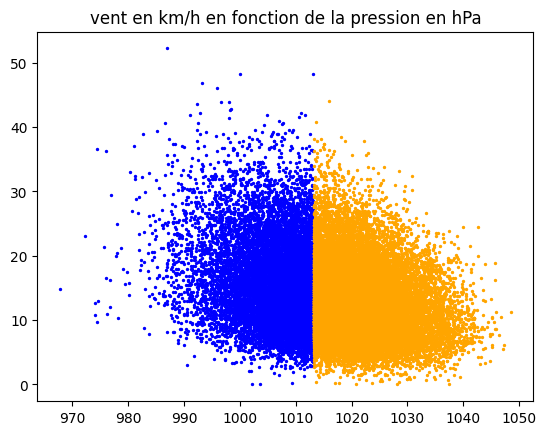

les basses pressions sont en bleu et les hautes en orange


In [27]:
mask = df['avg_sea_level_pres_hpa'] < 1013.15
df_b = df[mask]
df_h = df[~mask]
plt.scatter(x=df_b['avg_sea_level_pres_hpa'], y=df_b['avg_wind_speed_kmh'], s=2, color='blue') 
plt.scatter(x=df_h['avg_sea_level_pres_hpa'], y=df_h['avg_wind_speed_kmh'], s=2, color='orange')
plt.title('vent en km/h en fonction de la pression en hPa')
plt.show()
print('les basses pressions sont en bleu et les hautes en orange')

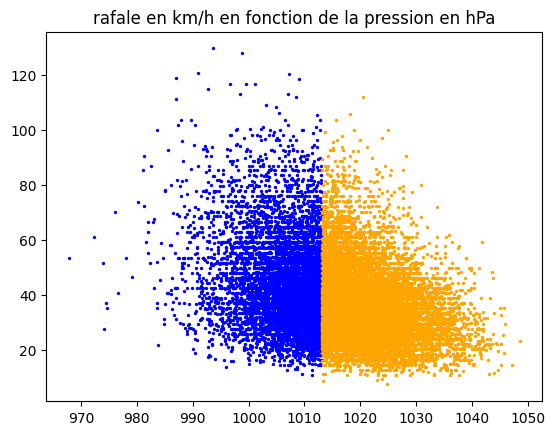

In [28]:
plt.scatter(x=df_b['avg_sea_level_pres_hpa'], y=df_b['peak_wind_gust_kmh'], s=2, color='blue')
plt.scatter(x=df_h['avg_sea_level_pres_hpa'], y=df_h['peak_wind_gust_kmh'], s=2, color='orange')
plt.title('rafale en km/h en fonction de la pression en hPa')
plt.show()

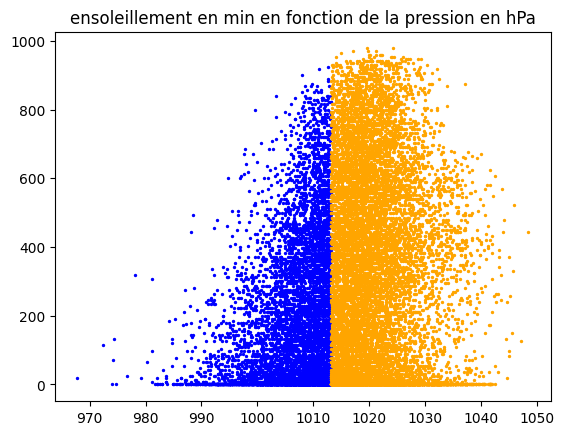

In [29]:
plt.scatter(x=df_b['avg_sea_level_pres_hpa'], y=df_b['sunshine_total_min'], s=2, color='blue')
plt.scatter(x=df_h['avg_sea_level_pres_hpa'], y=df_h['sunshine_total_min'], s=2, color='orange')
plt.title('ensoleillement en min en fonction de la pression en hPa')
plt.show()

COMMENTAIRES : 
Les valeurs semblent centrées autour de 1013 hPa ce qui corespond bien à la pression atmosphérique.
De plus, on remarque que ce soit pour le vent ou les rafales les fortes valeurs correspondent à des pressions plutôt faibles et inférieures à la pression atmosphérique (1013 hPa). 
Enfin les jours ensoleillés, avec moins de nuages, sont plus nombreux à des pressions plus élevées
On retrouve bien les caractéristiques des régimes dépressionnaires et anticycloniques.

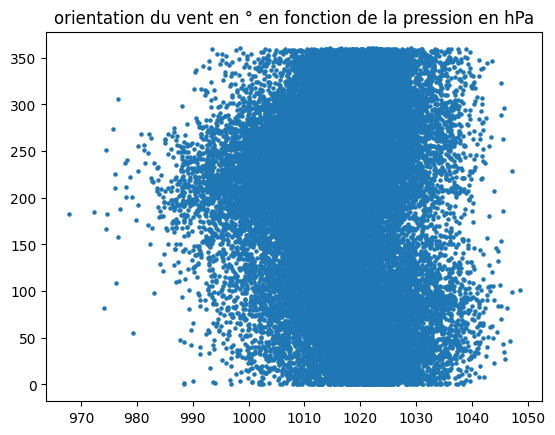

In [31]:
plt.scatter(x=df['avg_sea_level_pres_hpa'], y=df['avg_wind_dir_deg'], s=5)
plt.title('orientation du vent en ° en fonction de la pression en hPa')
plt.show()

COMMENTAIRES: On remarque que un vent direction nord-ouest et provenant du sud-est est souvent associé à de basses pressions ce qui correspond à la présence régulière d'une dépression dans l'Atlantique Nord :)